# Import library

In [4]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/AI ENG/WEEK 9/Dataset166.csv')
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,21,Travel_Frequently,251,Research & Development,10,2,Life Sciences,1,1279,...,3,80,0,2,2,1,2,2,2,2
1,No,29,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,3,80,1,10,1,3,10,9,8,8
2,No,55,Non-Travel,177,Research & Development,8,1,Medical,1,1278,...,4,80,1,34,3,3,33,9,15,0
3,No,46,Travel_Rarely,168,Sales,4,2,Marketing,1,1280,...,3,80,1,26,2,3,11,4,0,8
4,No,34,Travel_Rarely,131,Sales,2,3,Marketing,1,1281,...,4,80,0,4,3,3,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,34,Travel_Rarely,1239,Sales,13,4,Medical,1,1951,...,3,80,1,9,2,2,8,7,1,1
1466,No,26,Travel_Rarely,157,Research & Development,1,3,Medical,1,1952,...,4,80,0,8,6,2,7,7,7,6
1467,No,29,Travel_Rarely,136,Research & Development,1,3,Life Sciences,1,1954,...,1,80,1,6,5,2,5,3,0,2
1468,No,32,Non-Travel,1146,Research & Development,15,4,Medical,1,1955,...,2,80,1,9,6,3,5,1,1,2


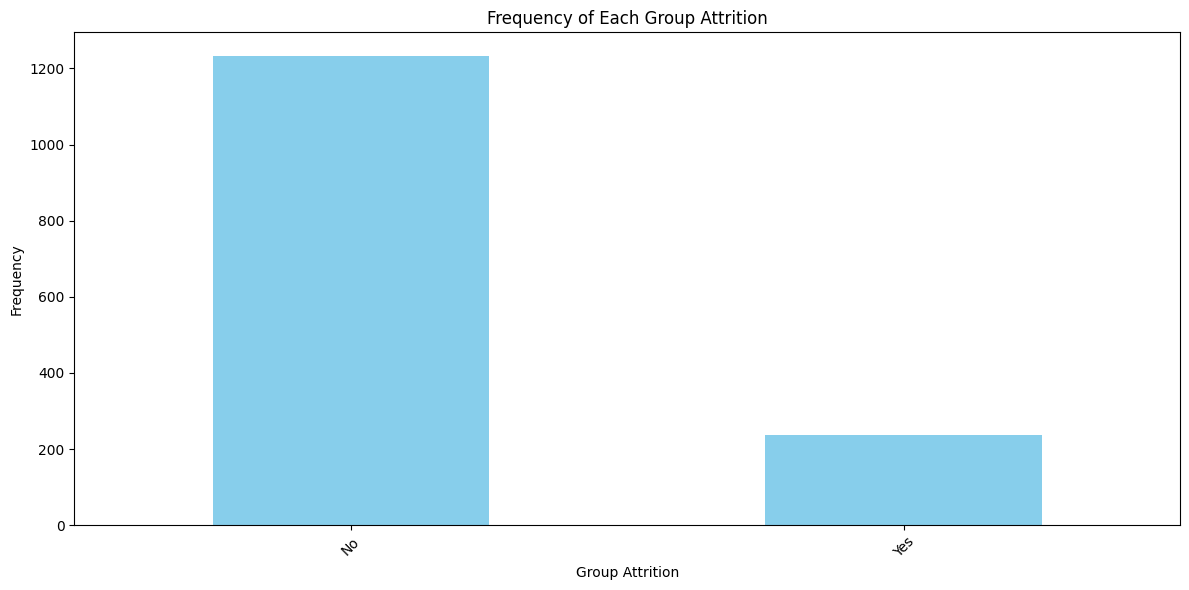

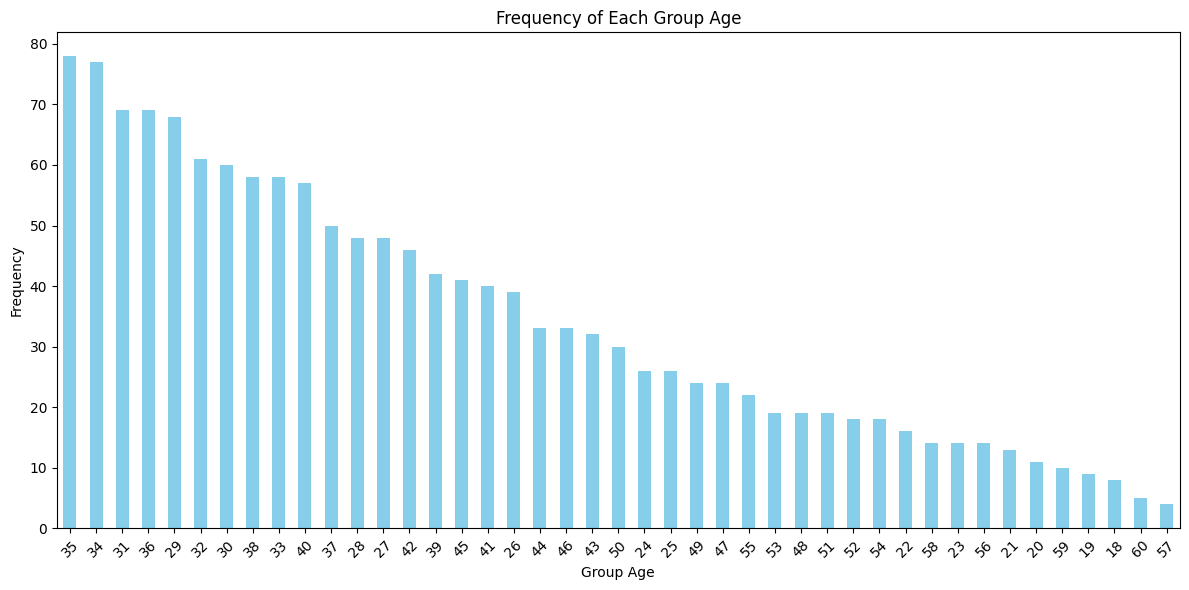

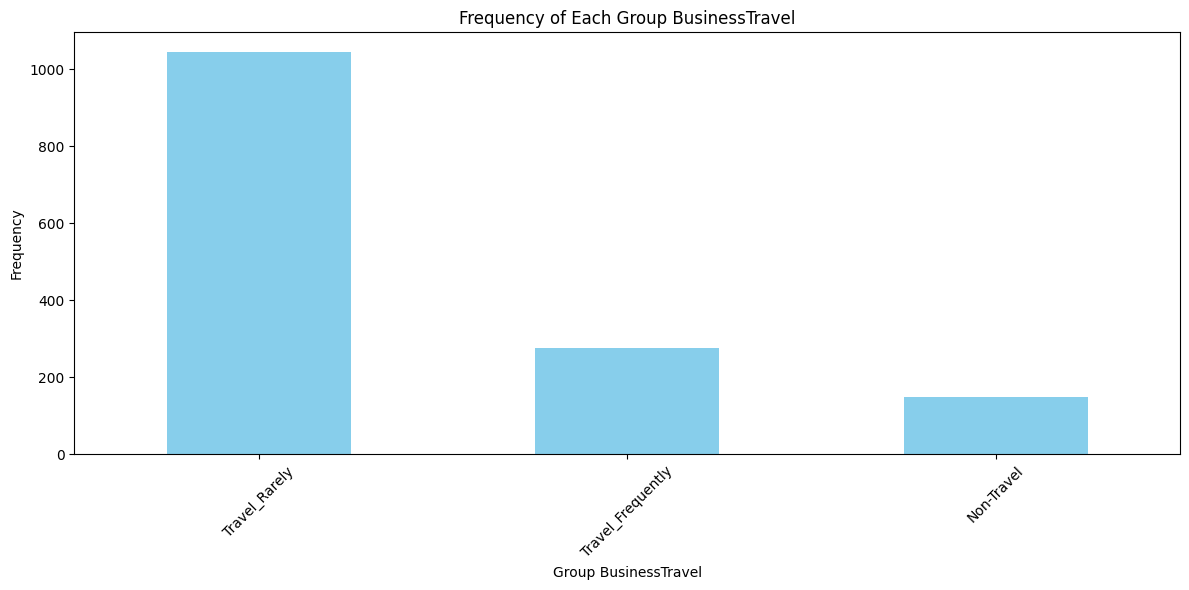

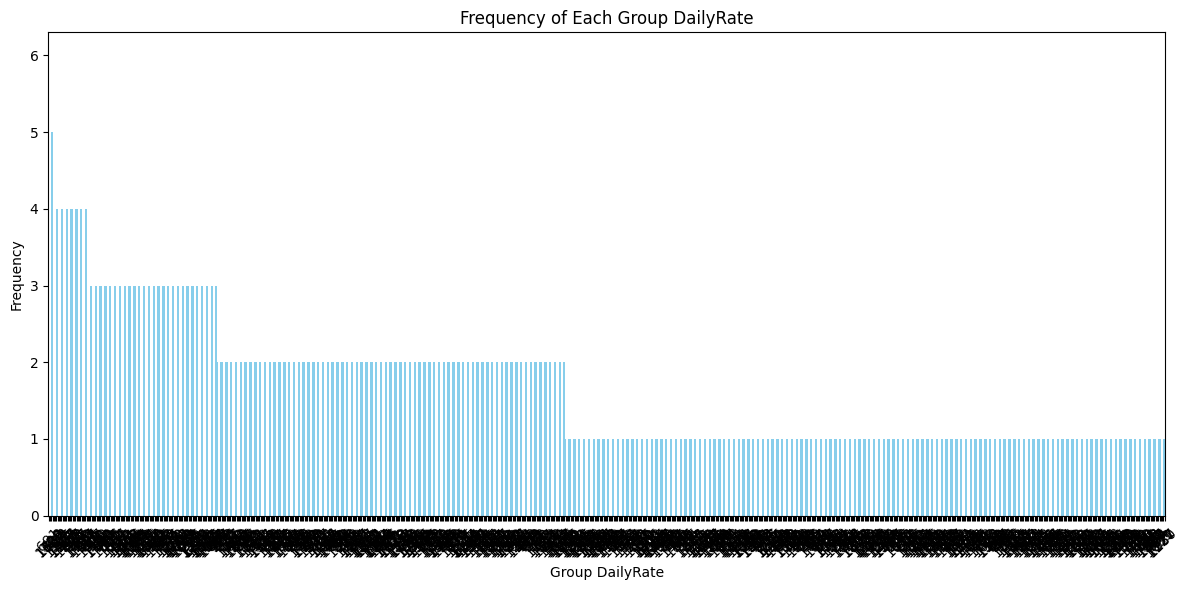

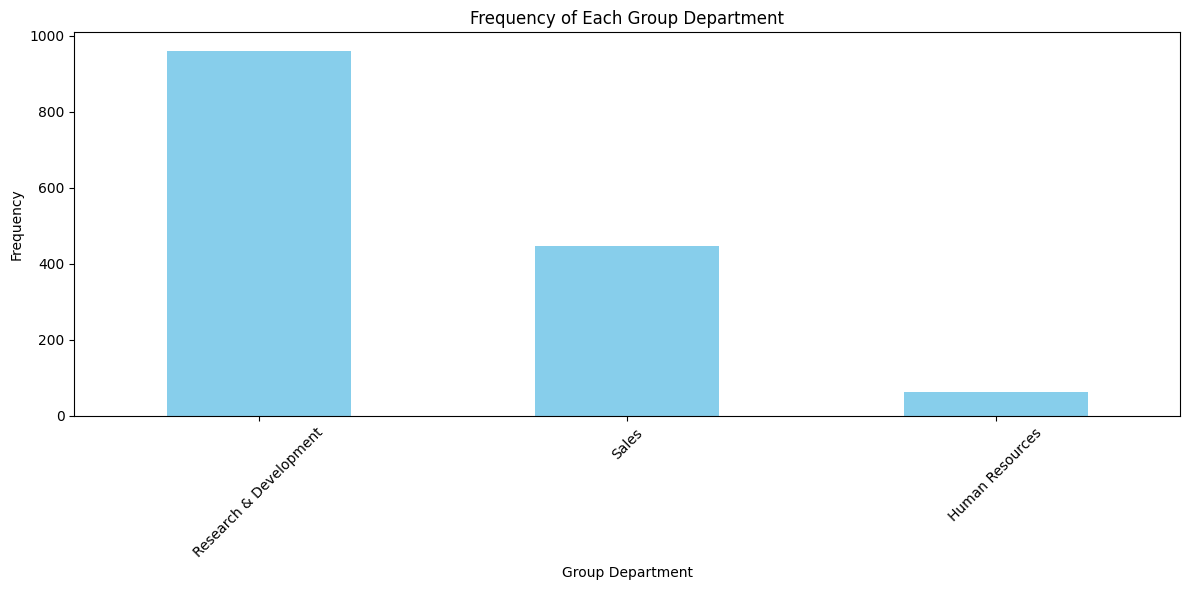

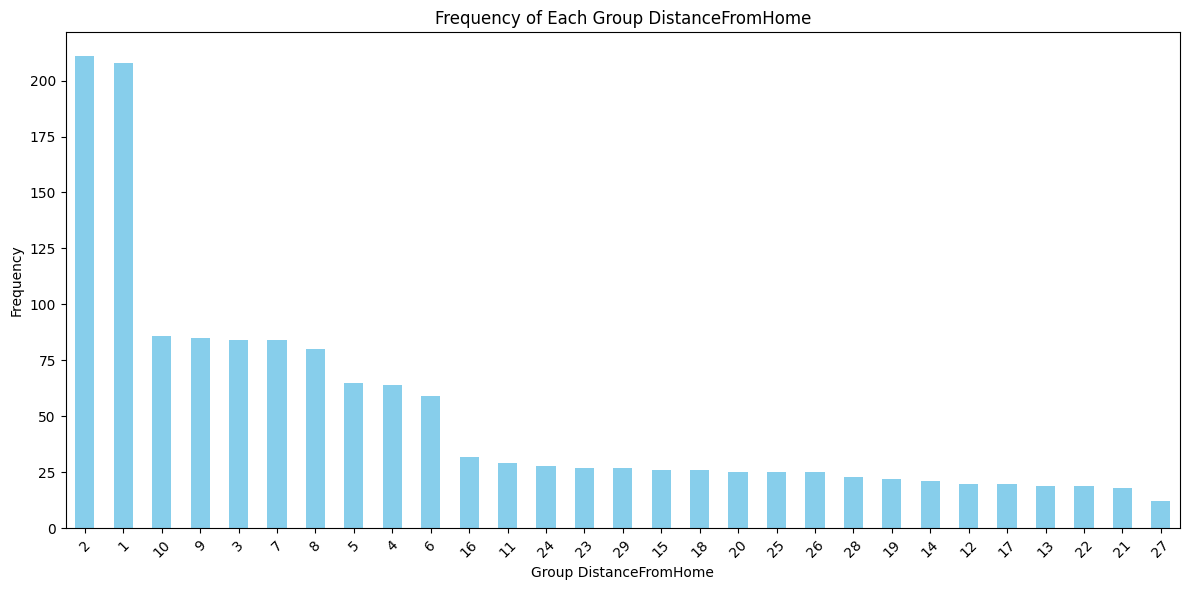

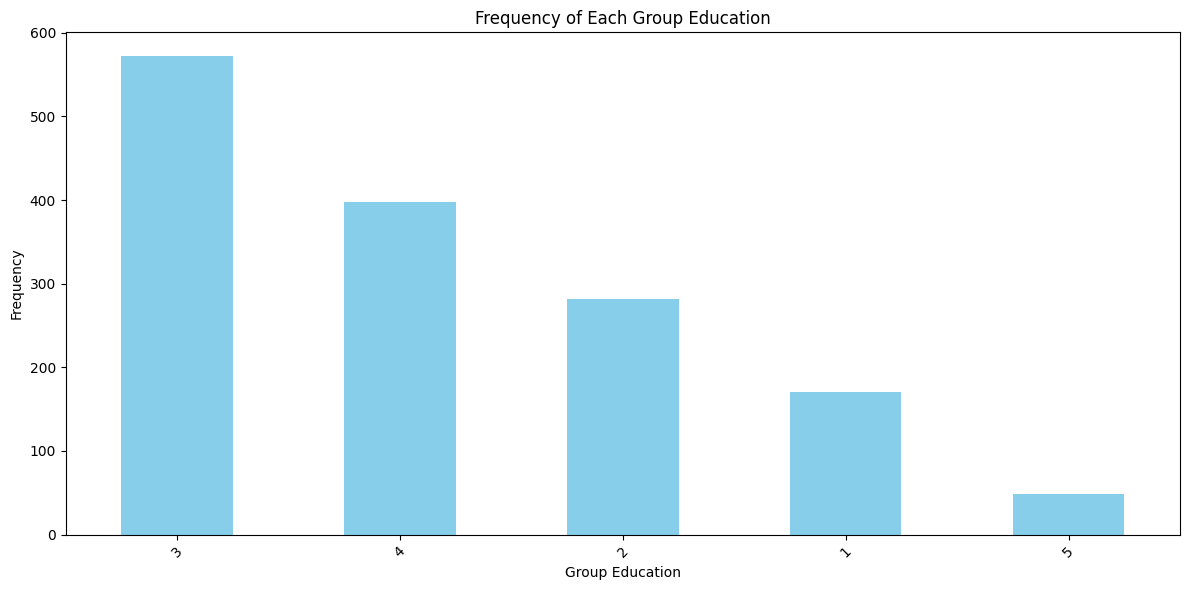

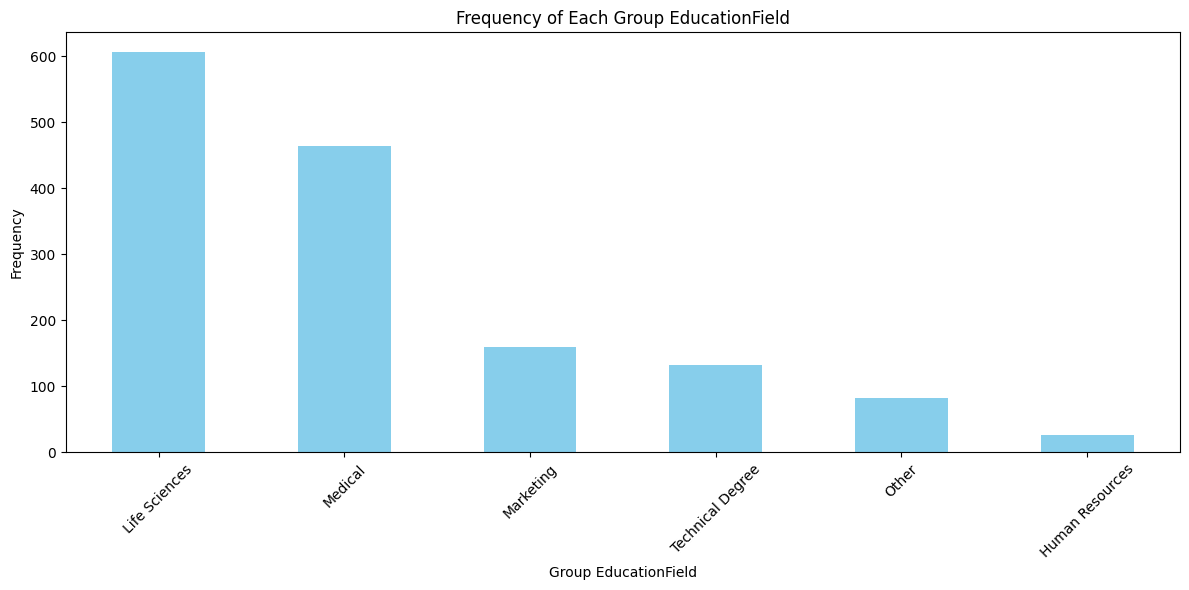

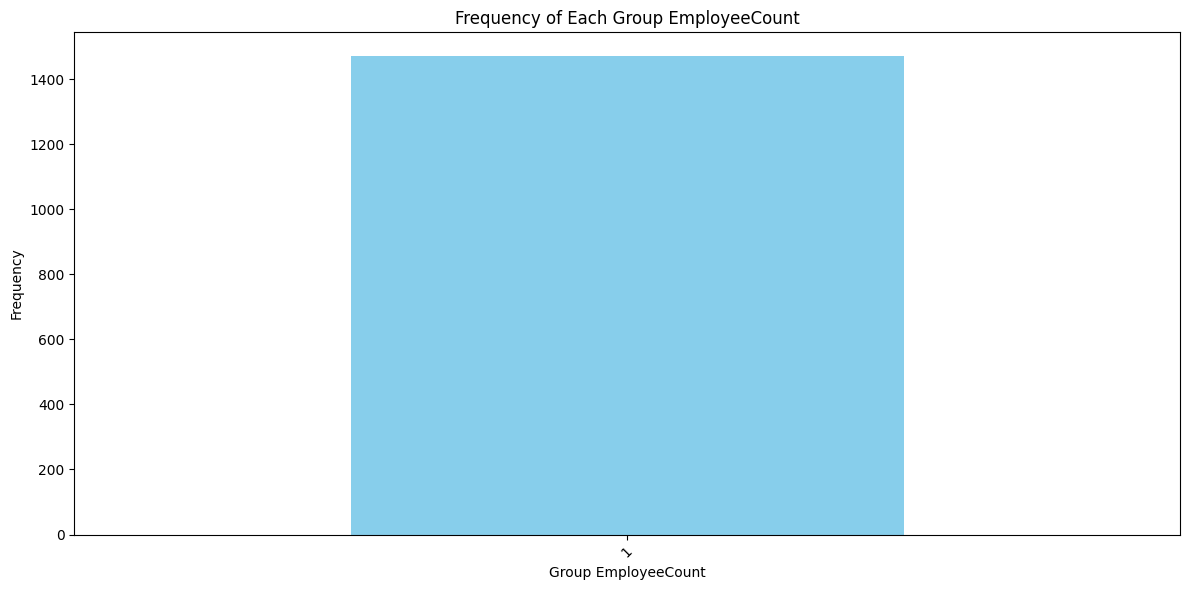

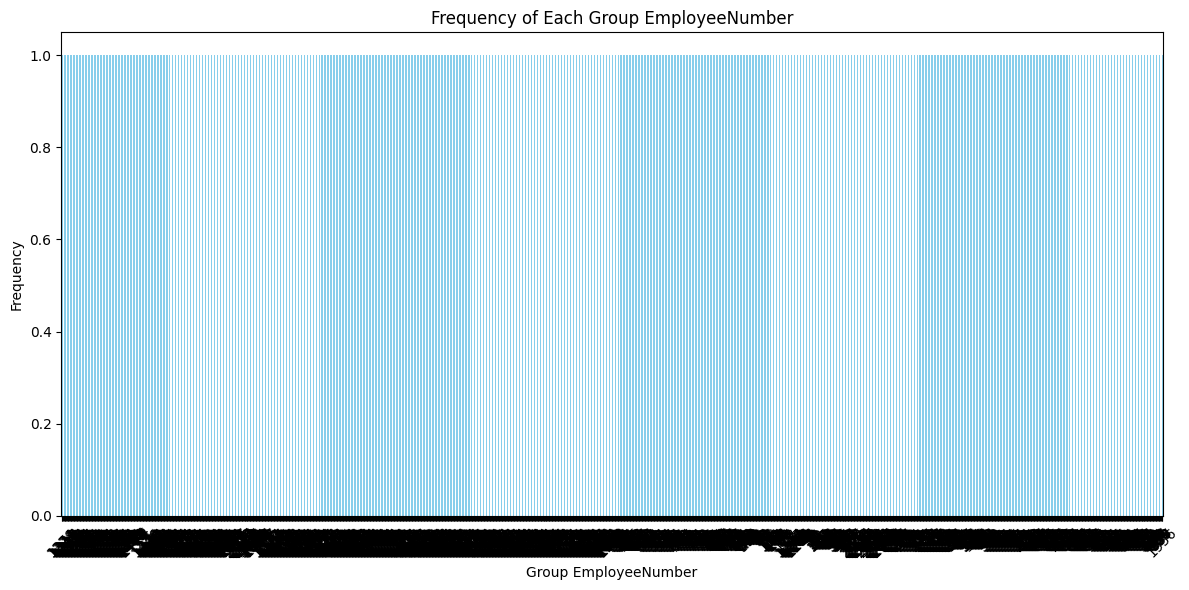

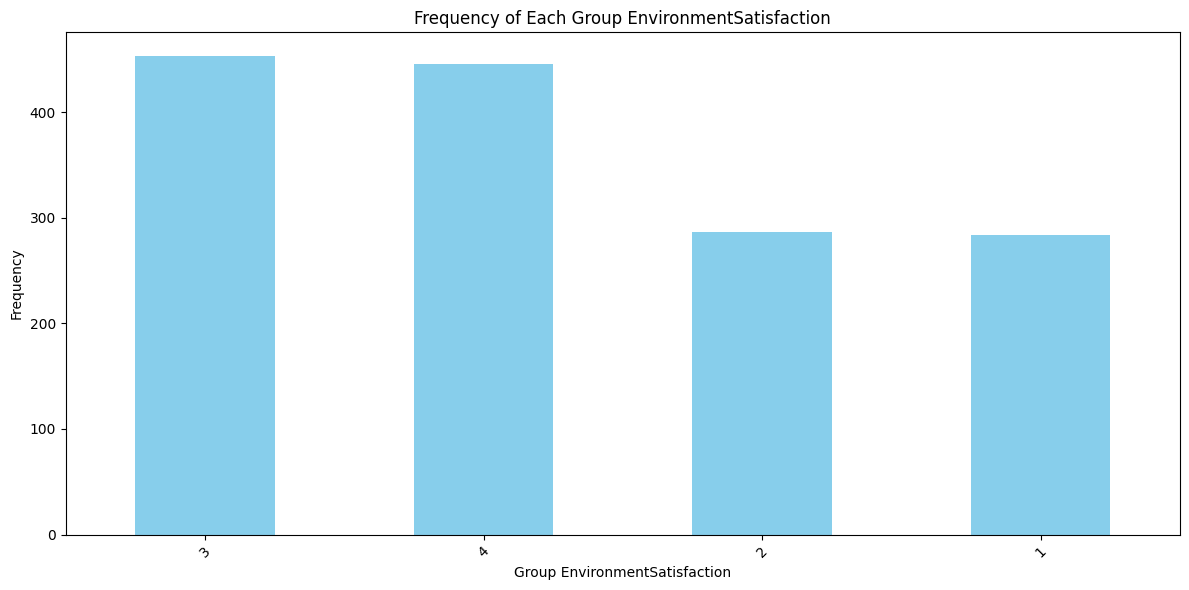

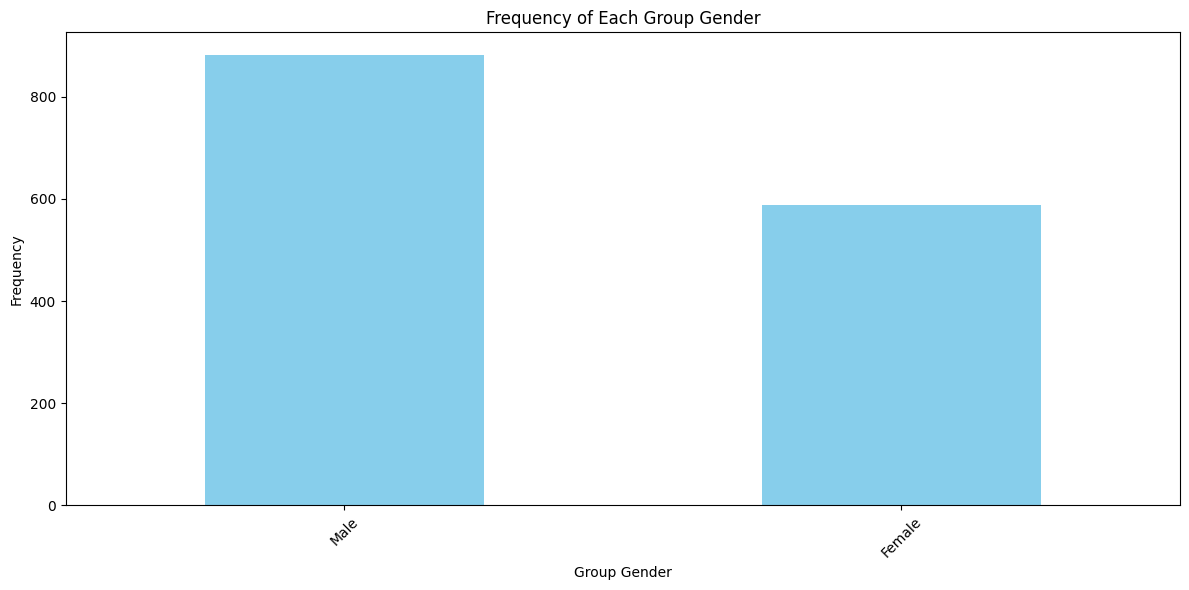

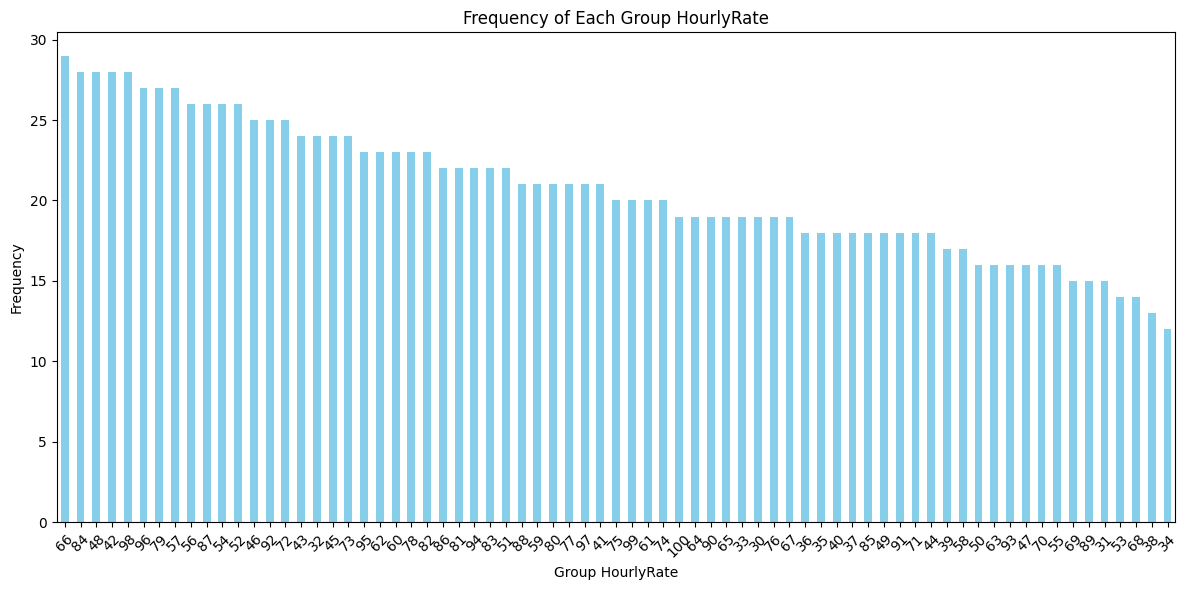

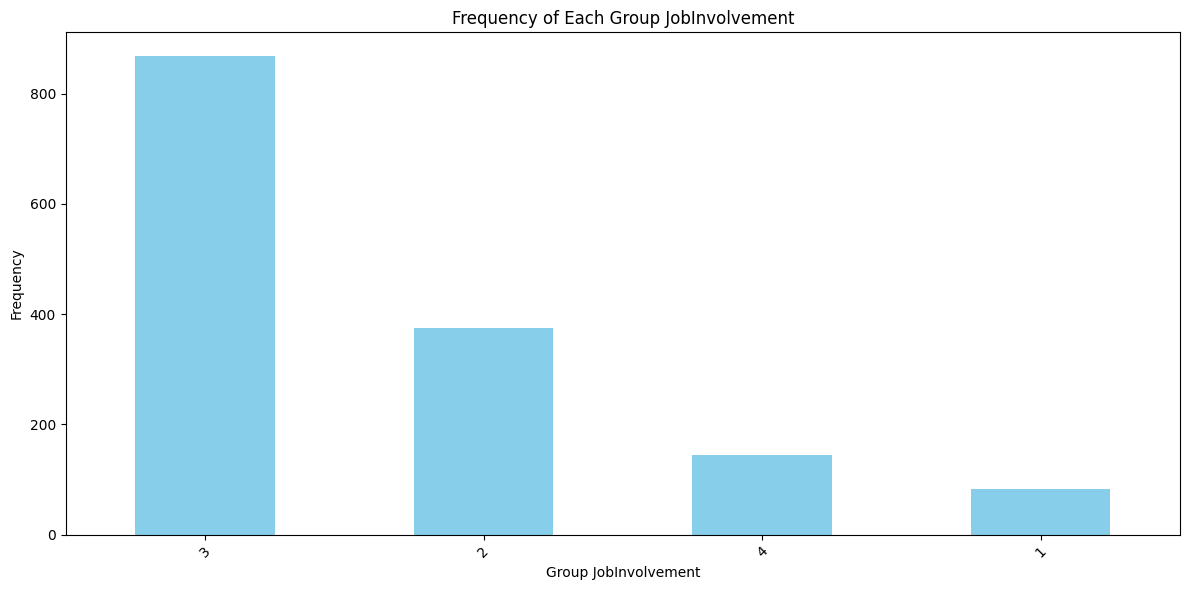

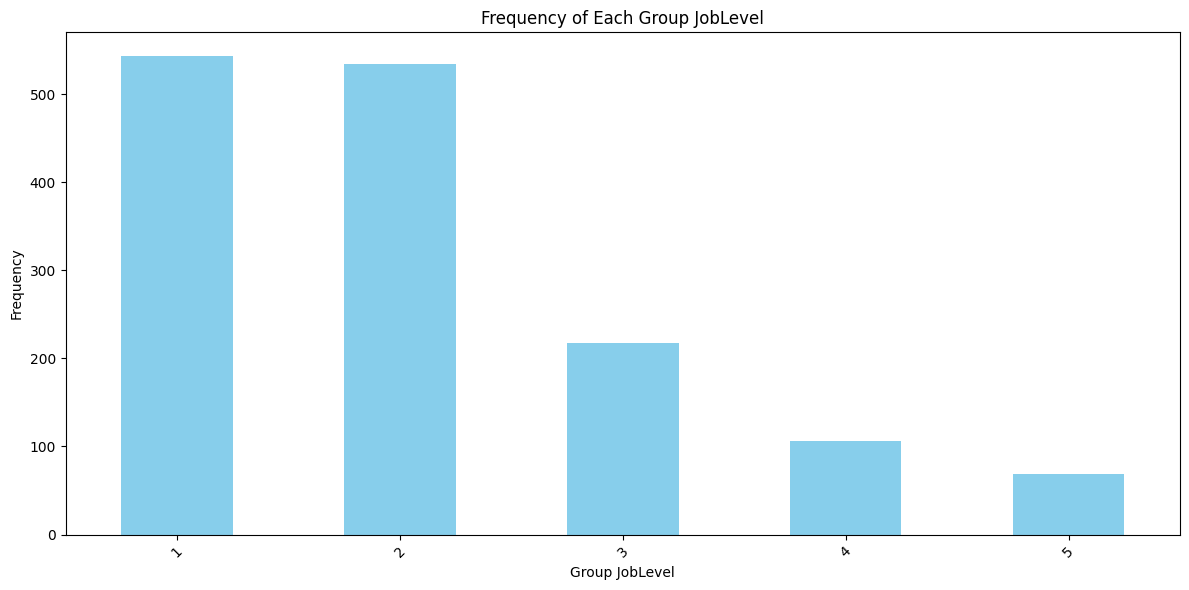

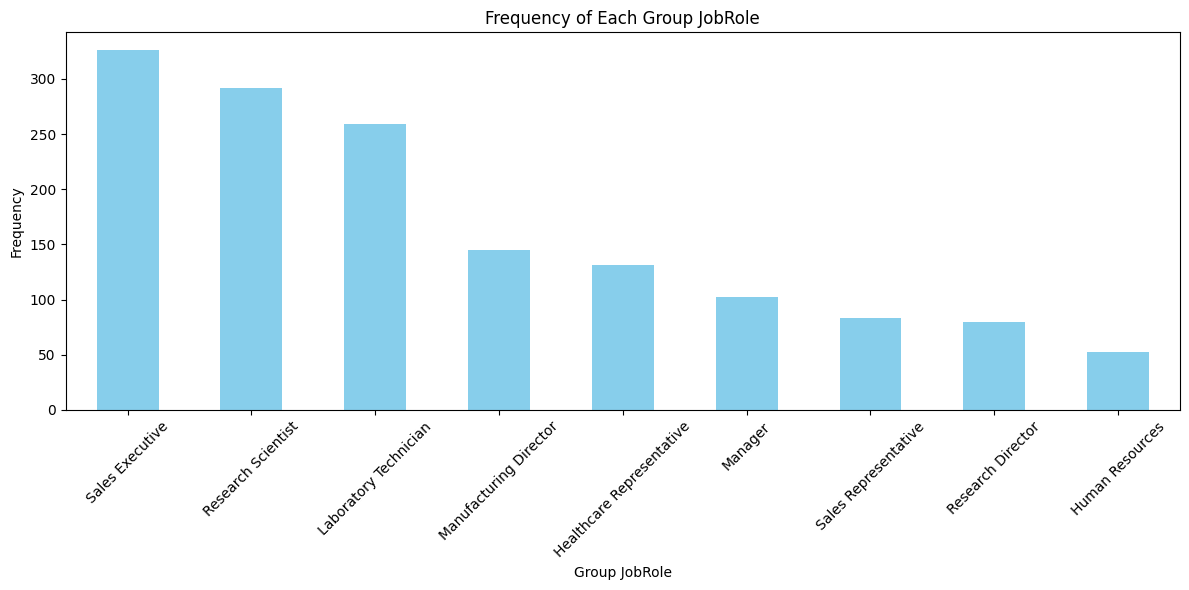

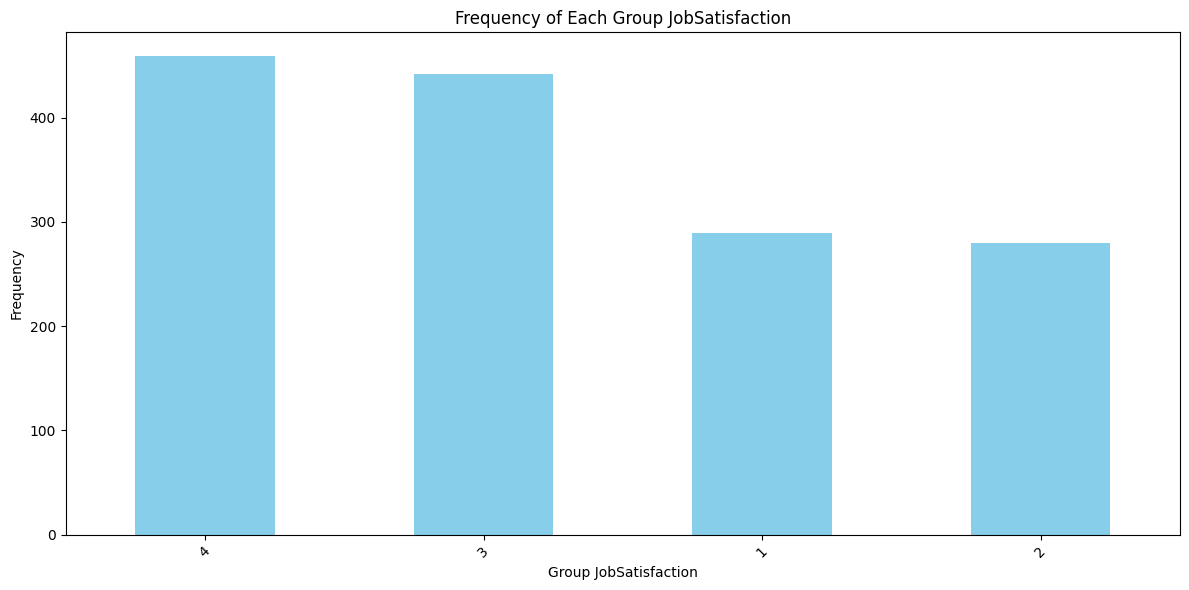

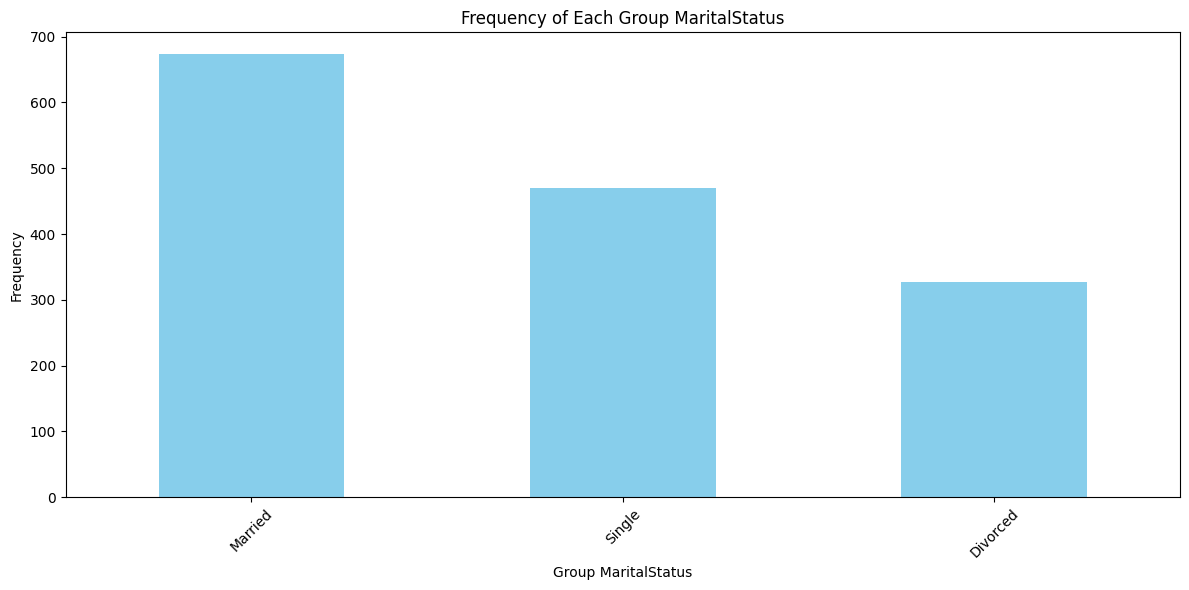

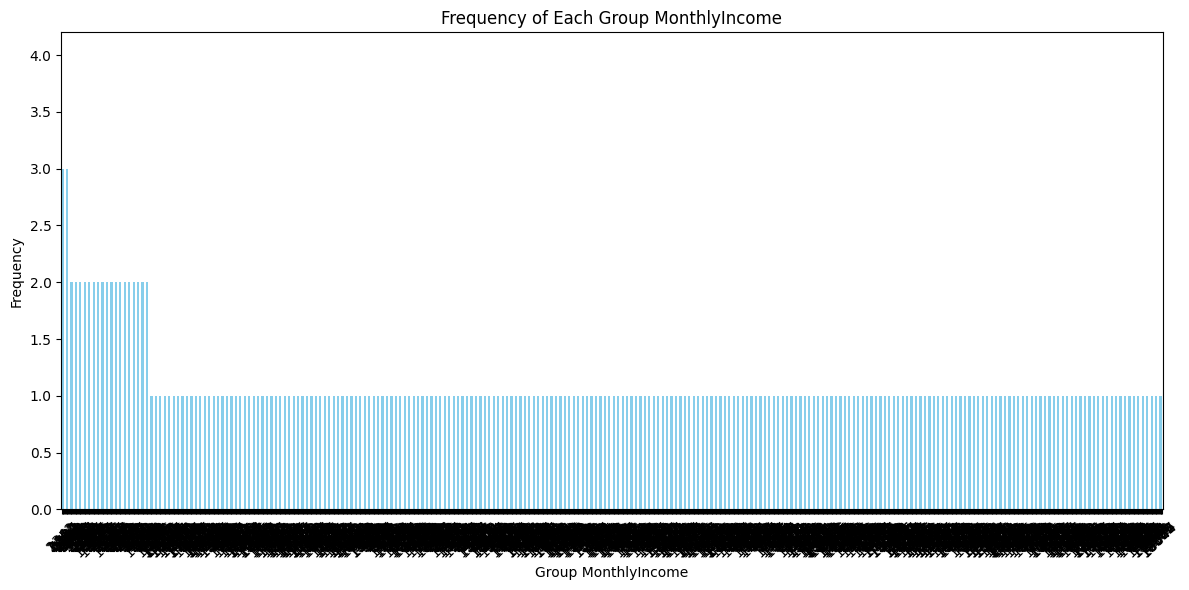

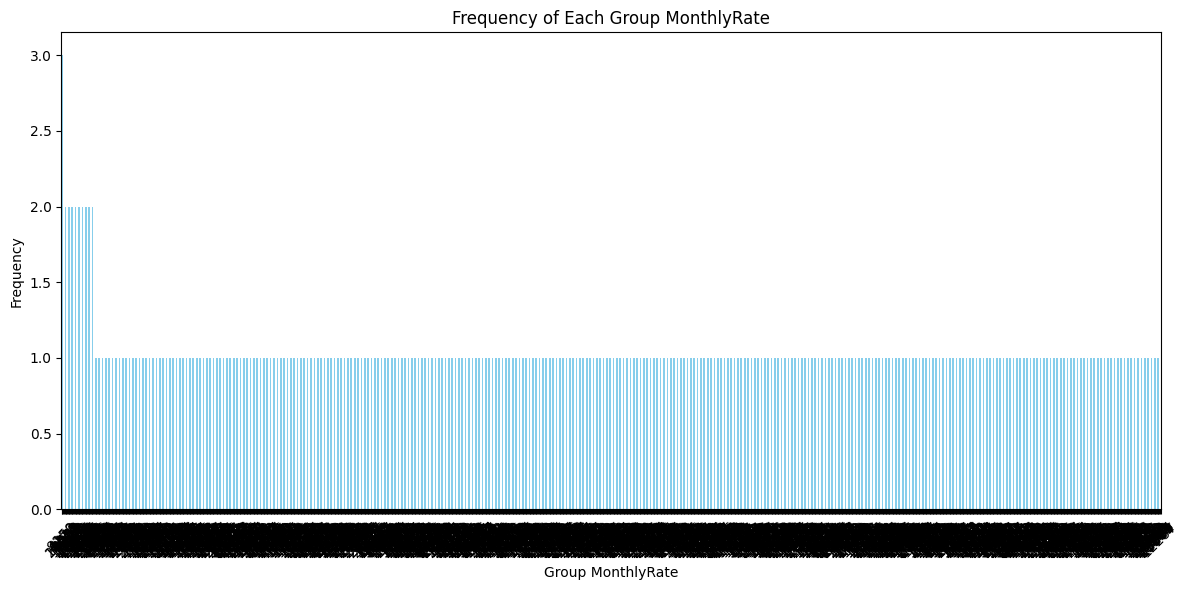

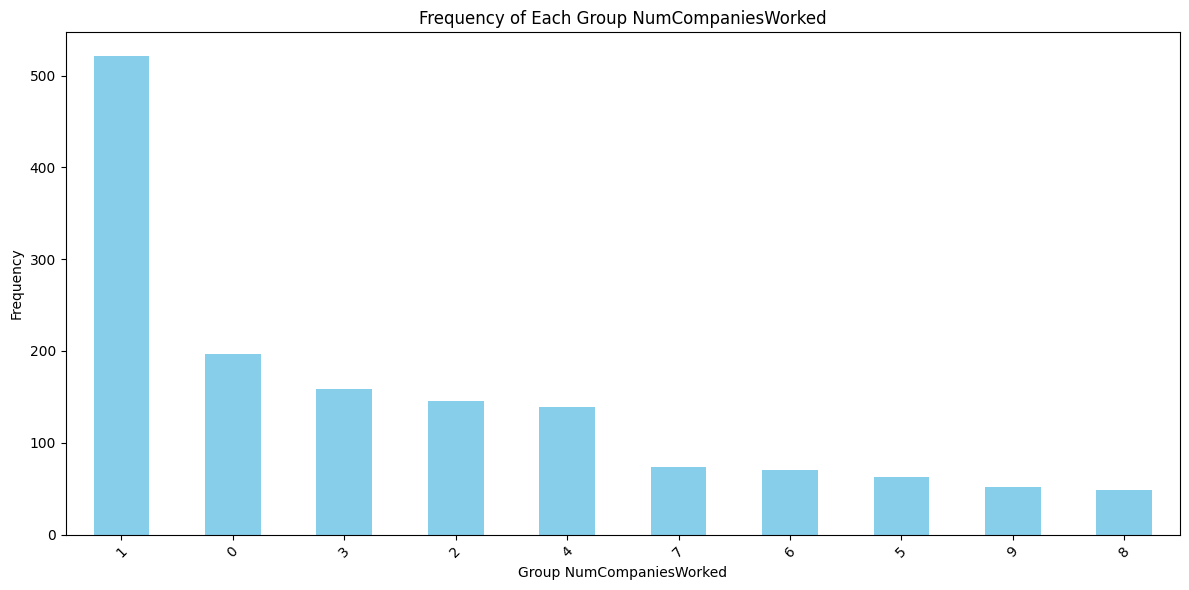

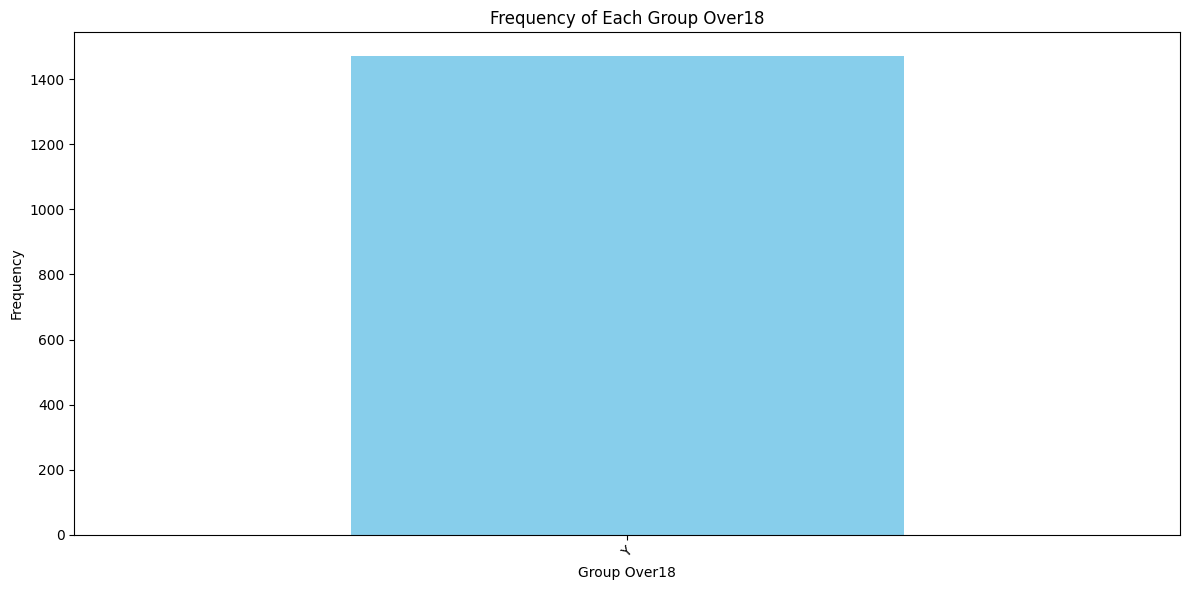

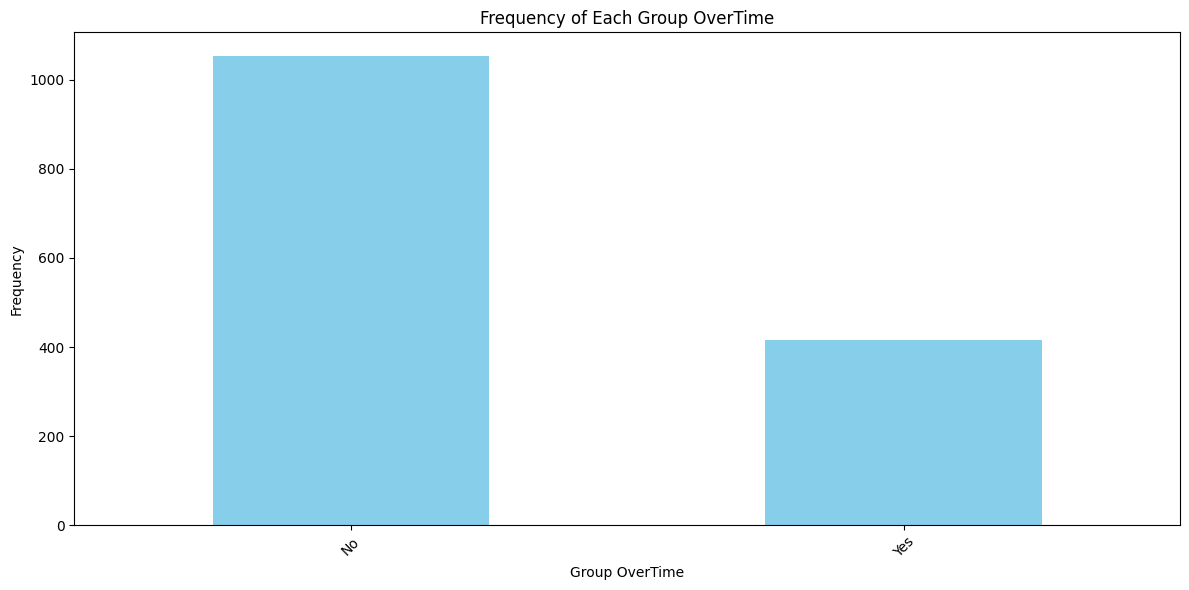

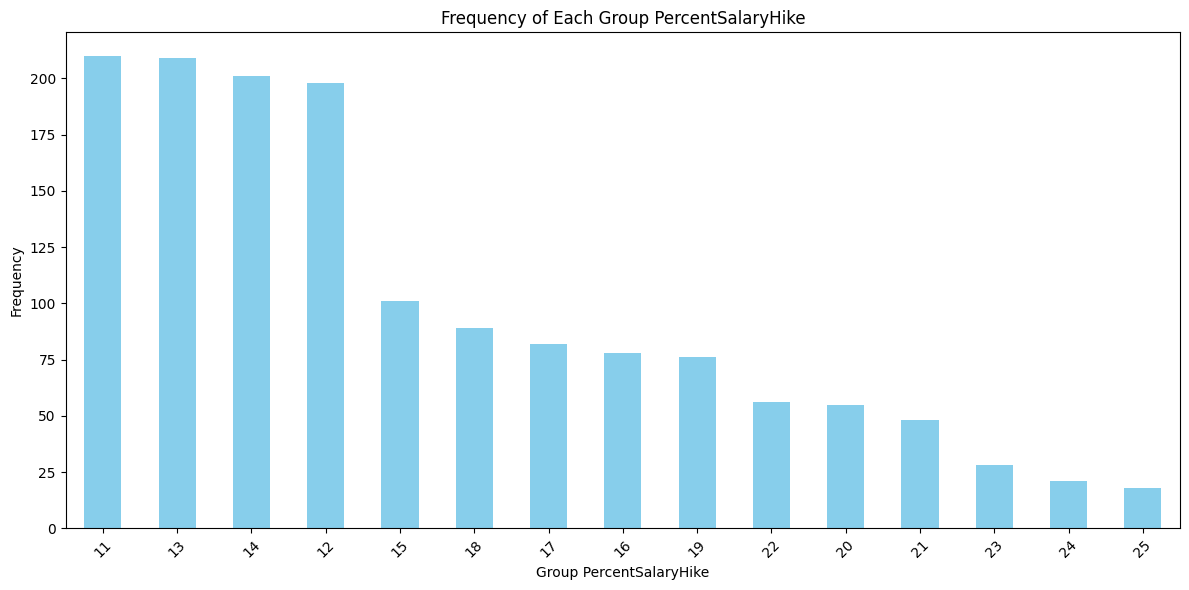

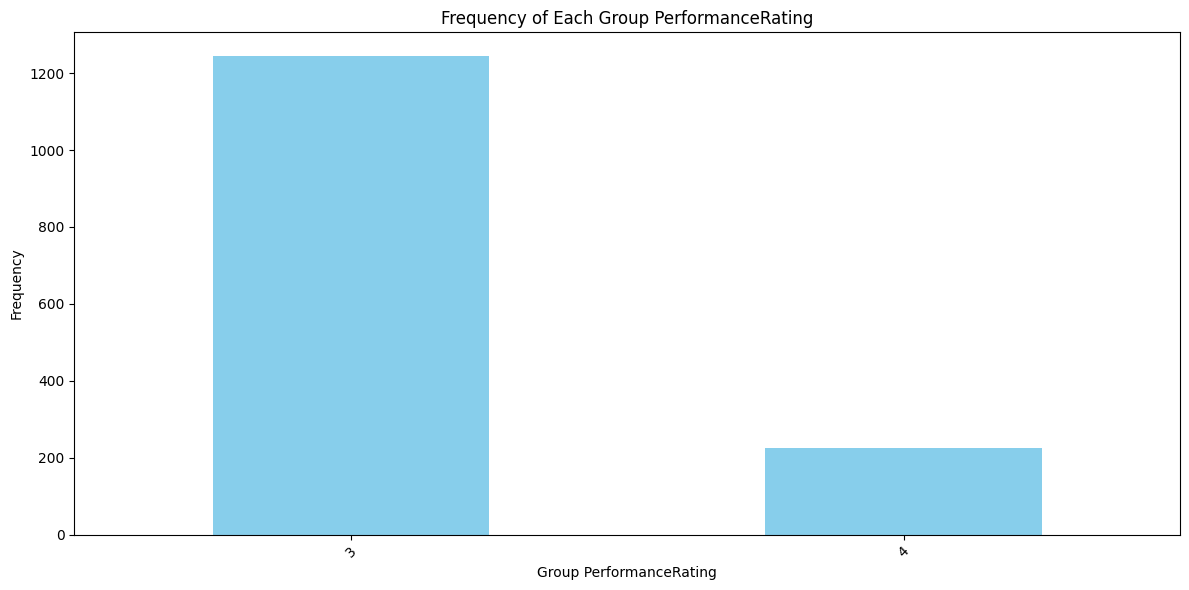

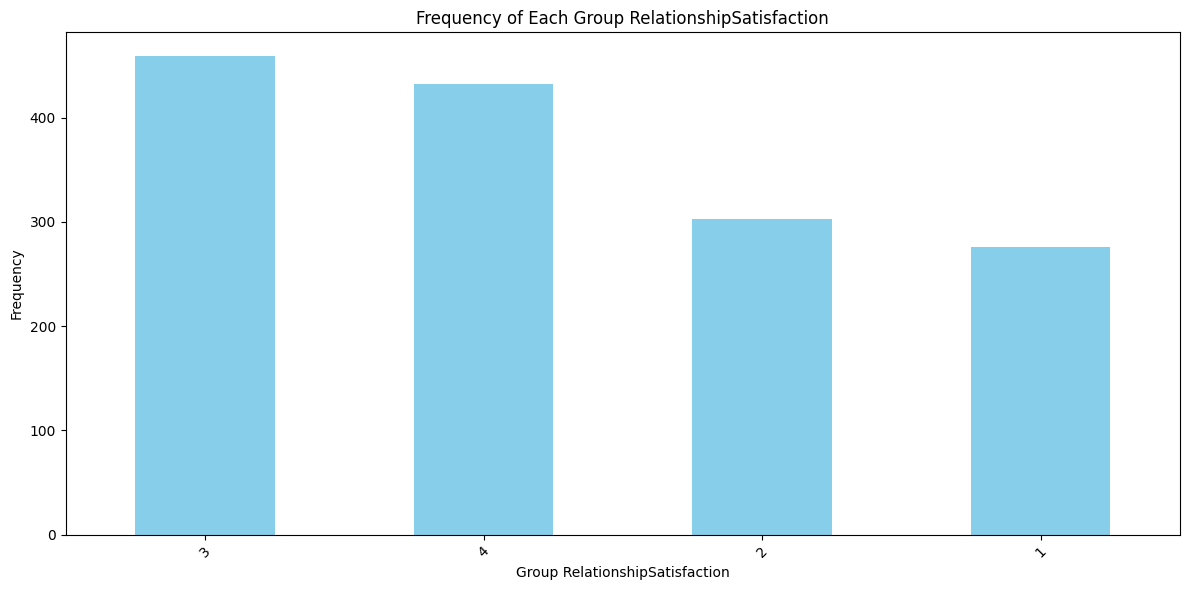

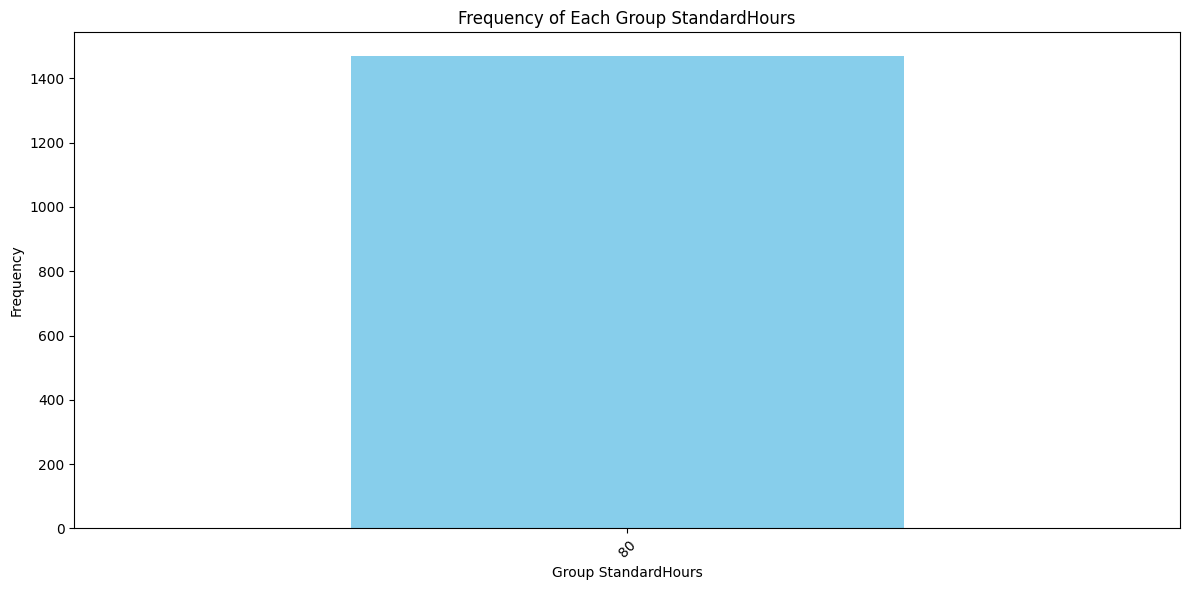

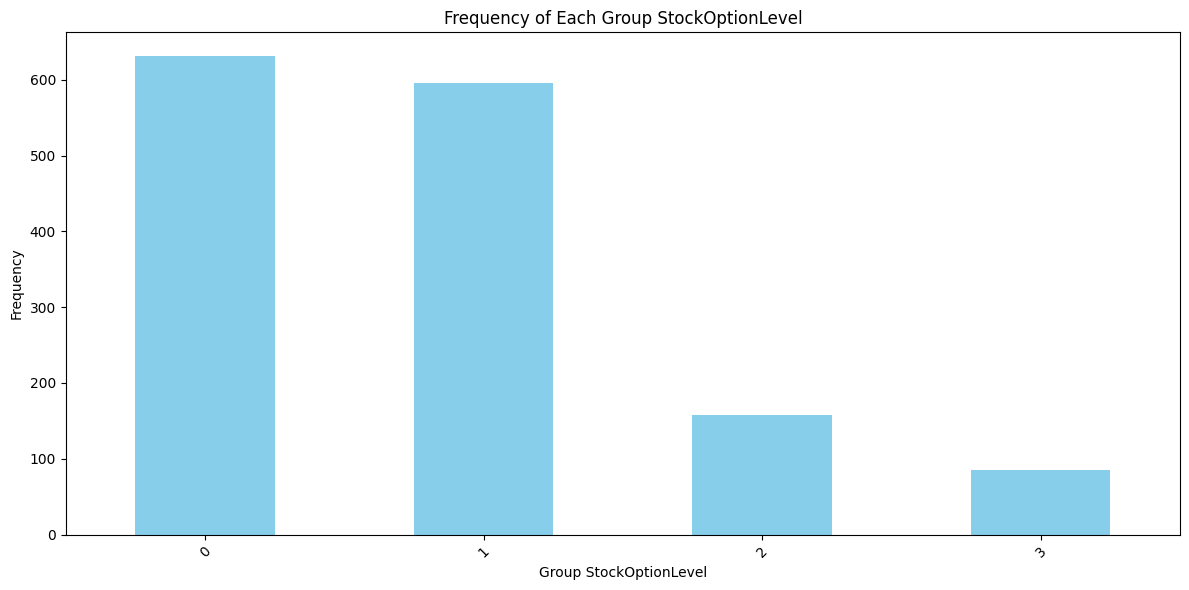

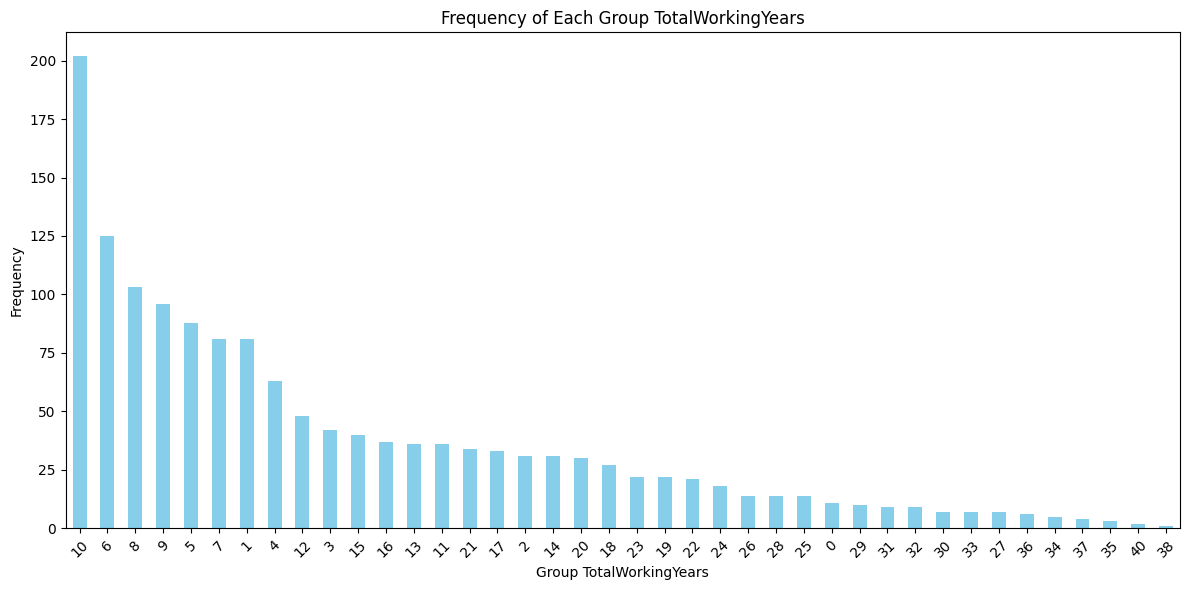

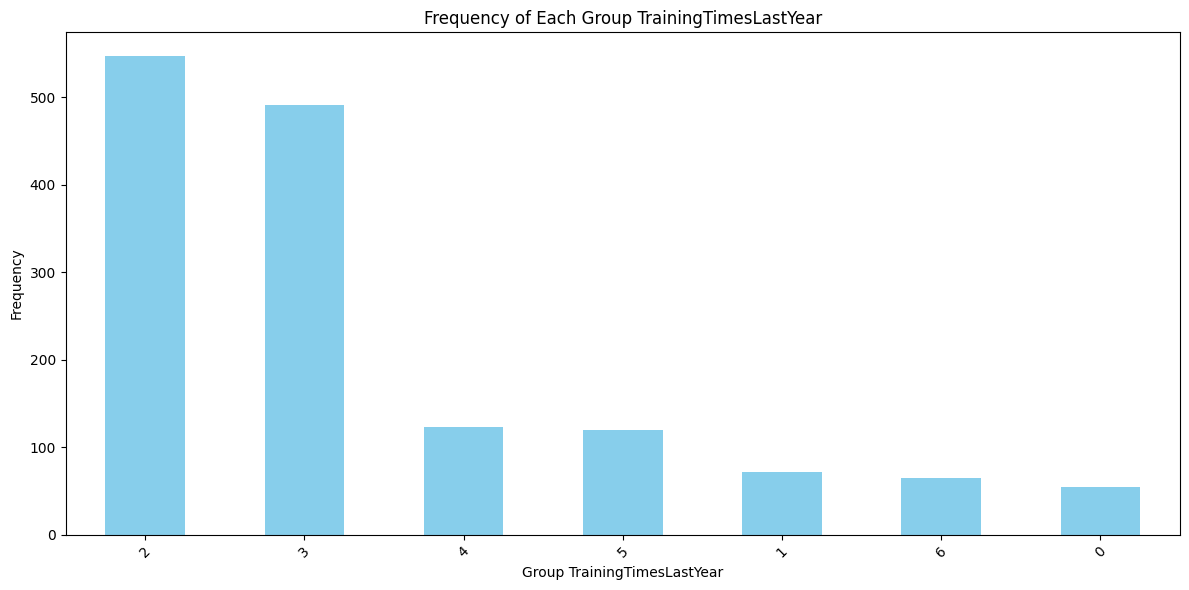

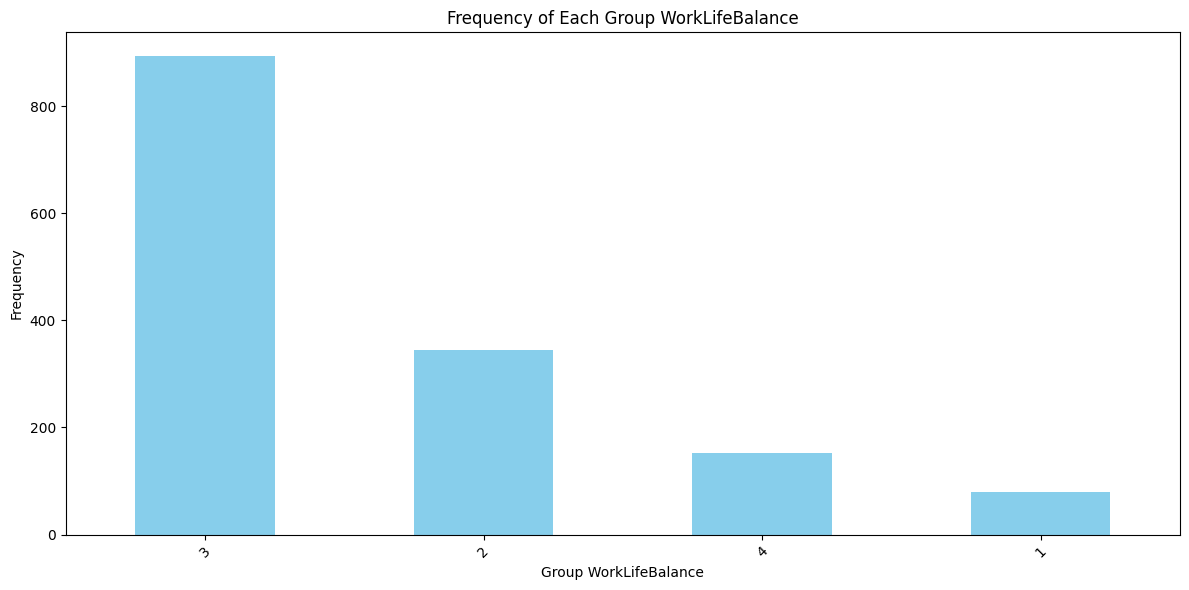

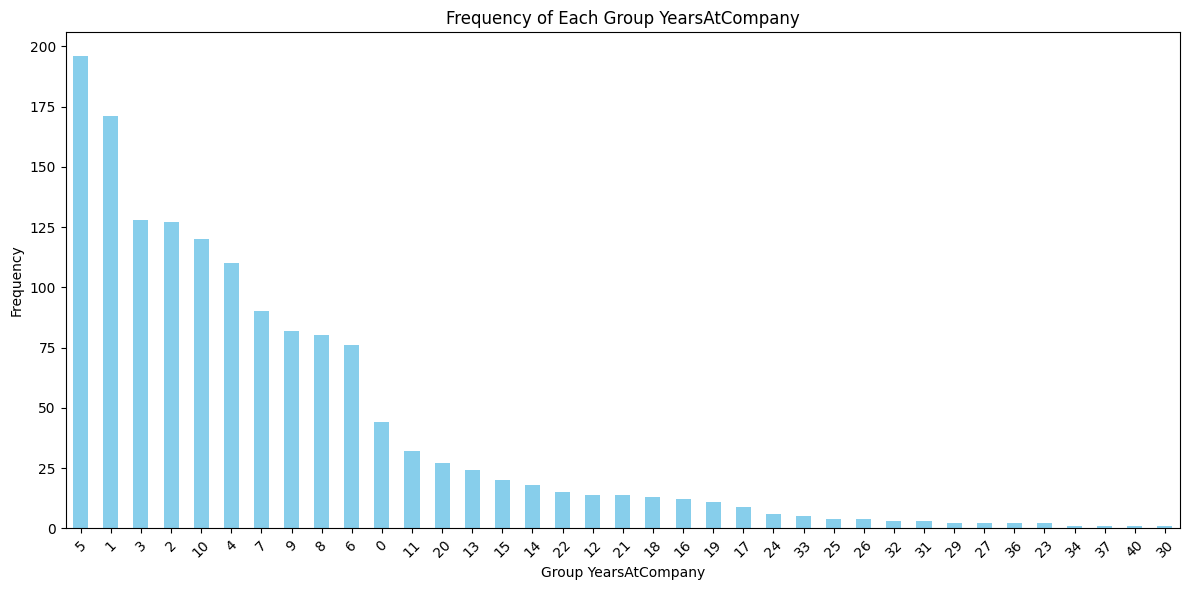

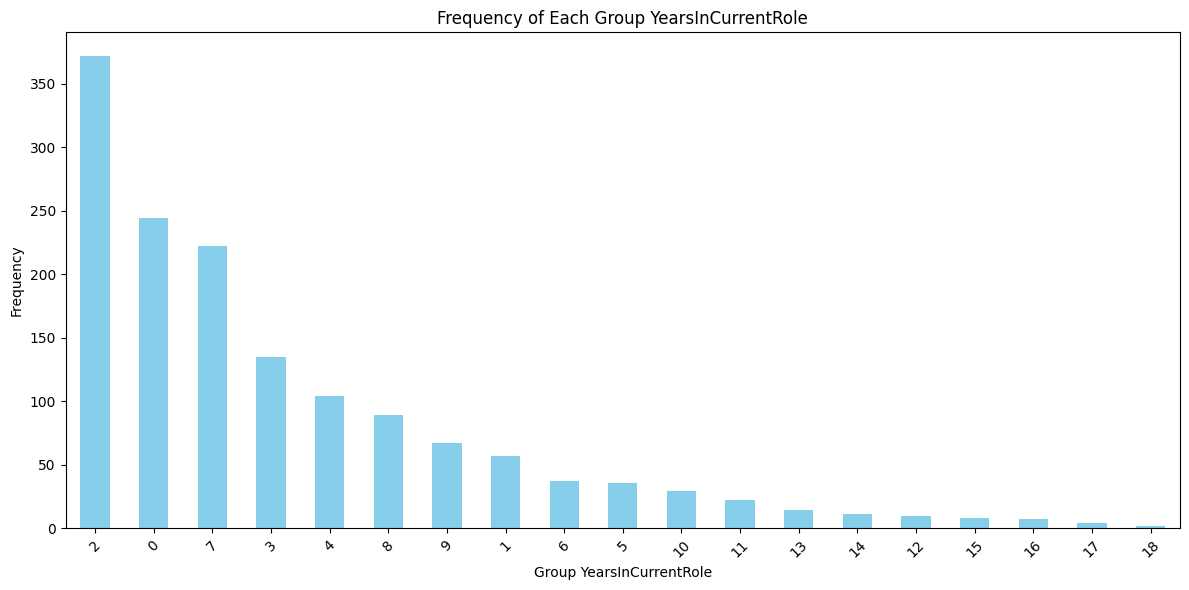

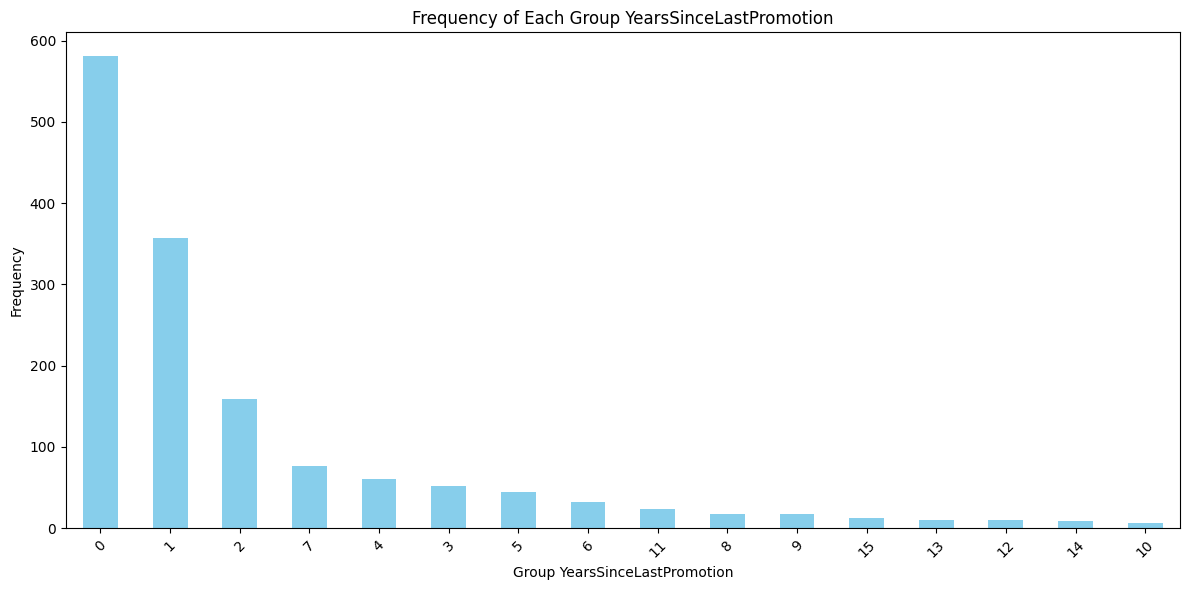

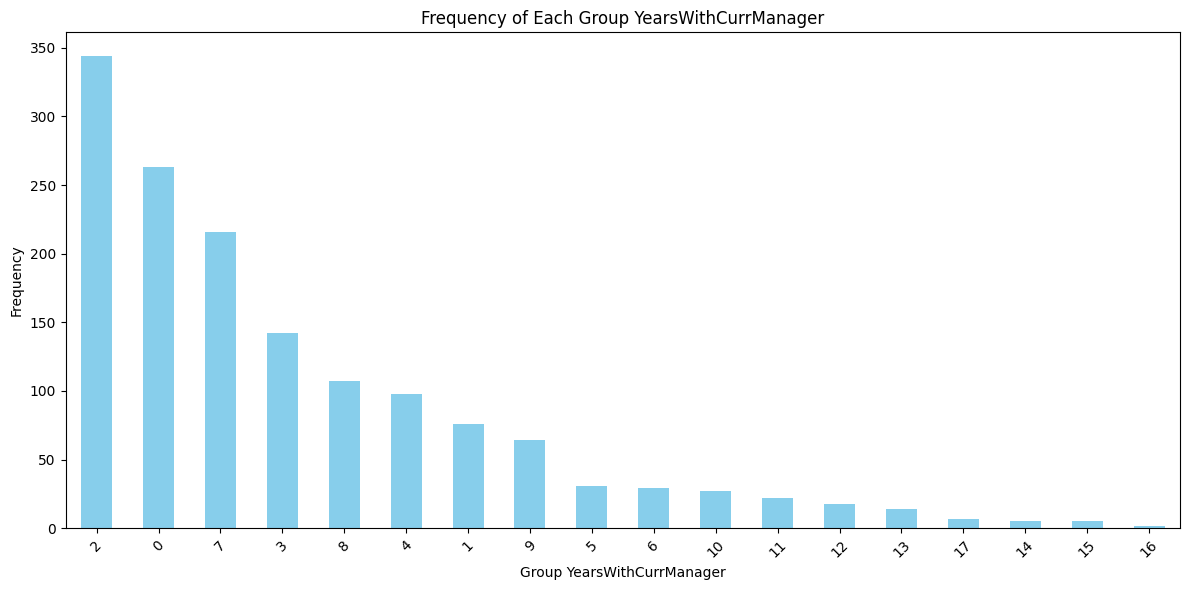

In [7]:
for column in df:

  group_column_counts = df[column].value_counts()

  plt.figure(figsize=(12, 6))
  group_column_counts.plot(kind='bar', color='skyblue')
  plt.title('Frequency of Each Group '+ column)
  plt.xlabel('Group '+column)
  plt.ylabel('Frequency')
  plt.xticks(rotation=45)
  plt.tight_layout()

  plt.show()

# Preprocessing

In [8]:
# use LabrlEncoder for label encoding classes to 0,1
labelencoder = LabelEncoder()
df['Attrition'] = labelencoder.fit_transform(df['Attrition'])
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,21,Travel_Frequently,251,Research & Development,10,2,Life Sciences,1,1279,...,3,80,0,2,2,1,2,2,2,2
1,0,29,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,3,80,1,10,1,3,10,9,8,8
2,0,55,Non-Travel,177,Research & Development,8,1,Medical,1,1278,...,4,80,1,34,3,3,33,9,15,0
3,0,46,Travel_Rarely,168,Sales,4,2,Marketing,1,1280,...,3,80,1,26,2,3,11,4,0,8
4,0,34,Travel_Rarely,131,Sales,2,3,Marketing,1,1281,...,4,80,0,4,3,3,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,34,Travel_Rarely,1239,Sales,13,4,Medical,1,1951,...,3,80,1,9,2,2,8,7,1,1
1466,0,26,Travel_Rarely,157,Research & Development,1,3,Medical,1,1952,...,4,80,0,8,6,2,7,7,7,6
1467,0,29,Travel_Rarely,136,Research & Development,1,3,Life Sciences,1,1954,...,1,80,1,6,5,2,5,3,0,2
1468,0,32,Non-Travel,1146,Research & Development,15,4,Medical,1,1955,...,2,80,1,9,6,3,5,1,1,2


In [9]:
# Remove variables that do not change across the observation
drop_columns = ['EmployeeCount', 'Over18', 'StandardHours']
df.drop(columns=[col for col in drop_columns if col in df.columns], inplace=True)
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,21,Travel_Frequently,251,Research & Development,10,2,Life Sciences,1279,1,...,4,3,0,2,2,1,2,2,2,2
1,0,29,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,20,2,...,3,3,1,10,1,3,10,9,8,8
2,0,55,Non-Travel,177,Research & Development,8,1,Medical,1278,4,...,3,4,1,34,3,3,33,9,15,0
3,0,46,Travel_Rarely,168,Sales,4,2,Marketing,1280,4,...,3,3,1,26,2,3,11,4,0,8
4,0,34,Travel_Rarely,131,Sales,2,3,Marketing,1281,3,...,3,4,0,4,3,3,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,34,Travel_Rarely,1239,Sales,13,4,Medical,1951,4,...,3,3,1,9,2,2,8,7,1,1
1466,0,26,Travel_Rarely,157,Research & Development,1,3,Medical,1952,3,...,3,4,0,8,6,2,7,7,7,6
1467,0,29,Travel_Rarely,136,Research & Development,1,3,Life Sciences,1954,1,...,3,1,1,6,5,2,5,3,0,2
1468,0,32,Non-Travel,1146,Research & Development,15,4,Medical,1955,3,...,3,2,1,9,6,3,5,1,1,2


In [10]:
# use LabrlEncoder handle all seven categorical variables
category_columns = df.select_dtypes(include=['object'])
for column in category_columns.columns:
  df[column] = labelencoder.fit_transform(df[column])
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,21,1,251,1,10,2,1,1279,1,...,4,3,0,2,2,1,2,2,2,2
1,0,29,2,1389,1,21,4,1,20,2,...,3,3,1,10,1,3,10,9,8,8
2,0,55,0,177,1,8,1,3,1278,4,...,3,4,1,34,3,3,33,9,15,0
3,0,46,2,168,2,4,2,2,1280,4,...,3,3,1,26,2,3,11,4,0,8
4,0,34,2,131,2,2,3,2,1281,3,...,3,4,0,4,3,3,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,34,2,1239,2,13,4,3,1951,4,...,3,3,1,9,2,2,8,7,1,1
1466,0,26,2,157,1,1,3,3,1952,3,...,3,4,0,8,6,2,7,7,7,6
1467,0,29,2,136,1,1,3,1,1954,1,...,3,1,1,6,5,2,5,3,0,2
1468,0,32,0,1146,1,15,4,3,1955,3,...,3,2,1,9,6,3,5,1,1,2


In [11]:
# split train test
x = df.drop(columns=['Attrition'])
y = df['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.20, random_state=101)

# DecisionTreeClassifier

### Call model

In [12]:
dtree = DecisionTreeClassifier()
model = dtree.fit(x_train, y_train)

### cross validation

In [13]:
dtree_y_pred = model.predict(x_test)

### report score

In [14]:
print(classification_report(y_test, dtree_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       247
           1       0.33      0.40      0.36        47

    accuracy                           0.77       294
   macro avg       0.60      0.62      0.61       294
weighted avg       0.79      0.77      0.78       294



### confusion matrix

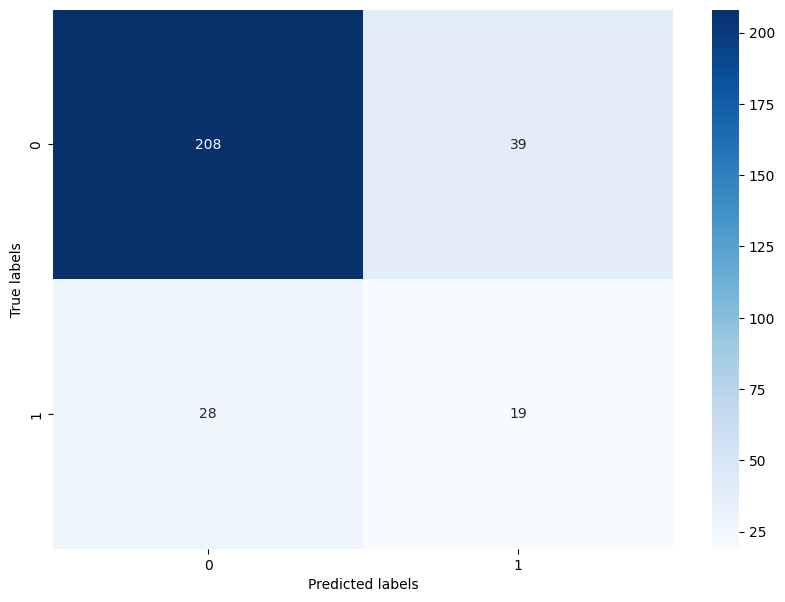

In [15]:
dtree_cm = confusion_matrix(y_test,dtree_y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(dtree_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### GridSearch

In [16]:
param_grid = {
    'criterion': ['gini'],
    'min_samples_split': [7,9,11,13,15],
    'min_samples_leaf': [3,5,7,9]
}

grid_search = GridSearchCV(dtree, param_grid, cv=5, verbose=2, n_jobs=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=9; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=9; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=9; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=9; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=9; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=11; total time=   0.0s
[C

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini'],
                         'min_samples_leaf': [3, 5, 7, 9],
                         'min_samples_split': [7, 9, 11, 13, 15]},
             verbose=2)

In [17]:
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_
best_train_score = grid_search.score(x_train, y_train)
print("best parameter:", best_params)
print("best score of cross-validation:", best_cv_score)
print("best score of train:", best_train_score)

best parameter: {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 15}
best score of cross-validation: 0.8333249188604398
best score of train: 0.9175170068027211


In [19]:
# train model using best parameter
dtree = DecisionTreeClassifier(criterion ='gini',
                                min_samples_leaf = 3,
                               min_samples_split = 15,
                               random_state=42
                              )
dtree.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=15,
                       random_state=42)

In [20]:
dtree_y_pred = dtree.predict(x_test)

In [21]:
print(classification_report(y_test, dtree_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       247
           1       0.28      0.23      0.26        47

    accuracy                           0.78       294
   macro avg       0.57      0.56      0.56       294
weighted avg       0.77      0.78      0.77       294

